In [1]:
# run this cell for interactive plots
%matplotlib notebook 

In [2]:
# run this cell for static plots
%matplotlib inline 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import sys
from sbpy.data import Names
from astroquery.jplsbdb import SBDB

# load data from the google sheet

Go to the google sheet and save the final_list_comp tab as a csv: file > download

In [4]:
fname = "best_radii - final_list_comp.csv"
df_sheet = pd.read_csv(fname,index_col=0)
df_sheet

,Periodic Number,Comet Type,Comet Name,Discovery ID,Comet Class,radius(km),radius error (km),CH3OH/H2O,err CH3OH/H2O,CH3OH/H2O Radio,...,Comet Type.1,Comet Name.1,Unnamed: 84,radius source,radius limit/notes (PDS),Optical Comp. data,IR Comp. data,Radio Comp. data,Unnamed: 90,Unnamed: 91
index,,,,,,,,,,,,,,,,,,,,,
0,2,P,Encke 1,NaN,EC,2.4,0.3,0.0348,0.0027,/,...,P,Encke 1,NaN,Lis et al. 2019,NaN,Y AH95/C12/F09,Y DR16/L21,Y CR09,NaN,NaN
1,9,P,Tempel 1,NaN,EC,2.72,NaN,0.014,0.002,0.028,...,P,Tempel 1,NaN,Lis et al. 2019,radius from spacecraft data,Y AH95/C12/F09/LS11,Y DR16/L21,Y CR09,NaN,NaN
2,10,P,Tempel 2,NaN,EC,2.465,0.135,0.0158,0.0023,0.018,...,P,Tempel 2,NaN,Bauer et al. 2017,NaN,Y C12/F09/LS11,Y DR16/L21,Y CR09,NaN,NaN
3,17,P,Holmes 1,NaN,EC,1.62,0.01,0.041,0.006,/,...,P,Holmes 1,NaN,Snodgrass et al. (2006) 19,NaN,Y LS11,Y DR16/L21,Y CR09,NaN,NaN
4,21,P,Giacobini-Zinner 1,NaN,EC,1.82,0.05,0.0122,0.0011,0.017,...,P,Giacobini-Zinner 1,NaN,Lis et al. 2019,NaN,Y AH95/C12/F09,Y DR16/Ro20/Fa19,Y CR09,NaN,NaN
5,45,P,Honda-Mrkos-Pajdusakova,NaN,EC,0.43,0.1,0.0359,0.0031,/,...,P,Honda-Mrkos-Pajdusakova,NaN,Lis et al. 2019,NaN,Y F09/TRAP,Y DR20,Y CR09,NaN,NaN
6,46,P,Wirtanen 1,NaN,EC,0.56,0.04,0.0303,0.0023,0.038,...,P,Wirtanen 1,NaN,Kokotanekova et al. 2017 (22),NaN,Y F09/TRAP/LS11,Y Ro21/Bo21,Y CR09,NaN,NaN
7,73,P,Schwassmann-Wachmann 3 C,NaN,EC,0.68,NaN,0.0049,0.0006,/,...,P,Schwassmann-Wachmann 3 C,NaN,Lamy et al. 2004 (Lamy et al.),"Fragment C. (Also r=1.1 Lis et al. 2019, measu...",Y,Y DR16/L21,Y CR09,Y,NaN
8,81,P,Wild 2,NaN,EC,2.1,NaN,0.009,0.003,/,...,P,Wild 2,NaN,Lis et al. 2019,NaN,Y AH95/F09/LS09,Y DR16,Y CR09,NaN,NaN


# Parse the data table into a plottable format

In [5]:
# might need to drop the last row if it contains column names
df_sheet = df_sheet.iloc[:-1]
df_sheet = df_sheet.dropna(how="all") # drop any completely nan rows
df_sheet

,Periodic Number,Comet Type,Comet Name,Discovery ID,Comet Class,radius(km),radius error (km),CH3OH/H2O,err CH3OH/H2O,CH3OH/H2O Radio,...,Comet Type.1,Comet Name.1,Unnamed: 84,radius source,radius limit/notes (PDS),Optical Comp. data,IR Comp. data,Radio Comp. data,Unnamed: 90,Unnamed: 91
index,,,,,,,,,,,,,,,,,,,,,
0,2,P,Encke 1,NaN,EC,2.4,0.3,0.0348,0.0027,/,...,P,Encke 1,NaN,Lis et al. 2019,NaN,Y AH95/C12/F09,Y DR16/L21,Y CR09,NaN,NaN
1,9,P,Tempel 1,NaN,EC,2.72,NaN,0.014,0.002,0.028,...,P,Tempel 1,NaN,Lis et al. 2019,radius from spacecraft data,Y AH95/C12/F09/LS11,Y DR16/L21,Y CR09,NaN,NaN
2,10,P,Tempel 2,NaN,EC,2.465,0.135,0.0158,0.0023,0.018,...,P,Tempel 2,NaN,Bauer et al. 2017,NaN,Y C12/F09/LS11,Y DR16/L21,Y CR09,NaN,NaN
3,17,P,Holmes 1,NaN,EC,1.62,0.01,0.041,0.006,/,...,P,Holmes 1,NaN,Snodgrass et al. (2006) 19,NaN,Y LS11,Y DR16/L21,Y CR09,NaN,NaN
4,21,P,Giacobini-Zinner 1,NaN,EC,1.82,0.05,0.0122,0.0011,0.017,...,P,Giacobini-Zinner 1,NaN,Lis et al. 2019,NaN,Y AH95/C12/F09,Y DR16/Ro20/Fa19,Y CR09,NaN,NaN
5,45,P,Honda-Mrkos-Pajdusakova,NaN,EC,0.43,0.1,0.0359,0.0031,/,...,P,Honda-Mrkos-Pajdusakova,NaN,Lis et al. 2019,NaN,Y F09/TRAP,Y DR20,Y CR09,NaN,NaN
6,46,P,Wirtanen 1,NaN,EC,0.56,0.04,0.0303,0.0023,0.038,...,P,Wirtanen 1,NaN,Kokotanekova et al. 2017 (22),NaN,Y F09/TRAP/LS11,Y Ro21/Bo21,Y CR09,NaN,NaN
7,73,P,Schwassmann-Wachmann 3 C,NaN,EC,0.68,NaN,0.0049,0.0006,/,...,P,Schwassmann-Wachmann 3 C,NaN,Lamy et al. 2004 (Lamy et al.),"Fragment C. (Also r=1.1 Lis et al. 2019, measu...",Y,Y DR16/L21,Y CR09,Y,NaN
8,81,P,Wild 2,NaN,EC,2.1,NaN,0.009,0.003,/,...,P,Wild 2,NaN,Lis et al. 2019,NaN,Y AH95/F09/LS09,Y DR16,Y CR09,NaN,NaN


In [6]:
# list all columns
list(df_sheet)

['Periodic Number',
 'Comet Type',
 'Comet Name',
 'Discovery ID',
 'Comet Class',
 'radius(km)',
 'radius error (km)',
 'CH3OH/H2O',
 'err CH3OH/H2O',
 'CH3OH/H2O Radio',
 'err CH3OH/H2O Radio',
 'HCN/H2O',
 'err HCN/H2O',
 'HCN/H2O Radio',
 'err HCN/H2O Radio',
 'NH3/H2O',
 'err NH3/H2O',
 'NH3/H2O radio',
 'err NH3/H2O radio',
 'H2CO/H2O',
 'err H2CO/H2O',
 'H2CO/H2O Radio',
 'err H2CO/H2O Radio',
 'C2H2/H2O',
 'err C2H2/H2O',
 'C2H6/H2O',
 'err C2H6/H2O',
 'CH4/H2O',
 'err CH4/H2O',
 'CO/H2O',
 'err CO/H2O',
 'CO/H2O_Radio',
 'err CO/H2O_Radio',
 'CO2/H2O',
 'err CO2/H2O',
 'CH3CN/H2O',
 'err CH3CN/H2O',
 'HNCO/H2O',
 'err HNCO/H2O',
 'H2S/H2O',
 'err H2S/H2O',
 'CS/H2O',
 'err CS/H2O',
 'Rh_mean_DR16',
 'Unnamed: 45',
 'Rh_std_DR16',
 'Comet_notes',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50',
 'Unnamed: 51',
 'Unnamed: 52',
 'MEAN_RH_AH95',
 'log CN/OH',
 '%err CN/OH',
 'CN/OH',
 'err CN/OH',
 'CN/H2O',
 'log C2/OH',
 '%err C2/OH',
 'C2/OH',
 'err C2/OH',
 'C2/H2O',
 'log C3/O

In [7]:
# strip any weird whitespaces
df_sheet = df_sheet.applymap(lambda x: x.strip() if type(x)==str else x)

In [8]:
# fix nans
df_sheet= df_sheet.replace('/',np.nan)

In [9]:
# drop the 2nd measurement of C/2012 S1 at low heliocentric distance
df_sheet = df_sheet[df_sheet["Comet_notes"]!="Rh <= 0.59 AU (f)"]

In [10]:
# fix the one weird error, use the average of the upper and lower bounds
df_sheet.loc[(np.array(df_sheet["Periodic Number"]).astype(float)==6),"radius error (km)"] = 0.14

In [11]:
# fix dtypes of some columns
float_cols = ["Periodic Number","radius(km)","radius error (km)"]

for x in float_cols:
    df_sheet[x] = df_sheet[x].astype("float64")

In [12]:
# make sure these columns are floats for plotting etc.
comp_columns = ["CH3OH/H2O",
                    "HCN/H2O",
                    "NH3/H2O",
                    "H2CO/H2O",
                    "C2H2/H2O",
                    "C2H6/H2O",
                    "CH4/H2O",
                    "CO/H2O",
                    "CO2/H2O",
                    "CH3CN/H2O",
                    "HNCO/H2O",
                    "H2S/H2O",
                    "CS/H2O",
                    "CN/OH",
                    "C2/OH",
                    "C3/OH",
                    "NH/OH",
                    "C2/CN",
                    "Afrho/OH"]

In [13]:
n_data = []
for x in comp_columns:
    df_sheet[x] = df_sheet[x].astype("float64")
    df_sheet["err "+x] = df_sheet["err "+x].astype("float64")
    
    # record number of not nan measurements
    n = len(df_sheet[~np.isnan(df_sheet[x])])
    n_data.append(n)
    
# gather some meta data for each composition column - number of comets with measurement
df_meta = pd.DataFrame()
df_meta["comp_col"] = comp_columns
df_meta["n_data"] = n_data

In [14]:
df_meta.sort_values("n_data")

,comp_col,n_data
10,HNCO/H2O,3
9,CH3CN/H2O,5
12,CS/H2O,8
11,H2S/H2O,9
8,CO2/H2O,13
2,NH3/H2O,16
6,CH4/H2O,18
3,H2CO/H2O,19
7,CO/H2O,19
4,C2H2/H2O,22


# Look at the cometary radii

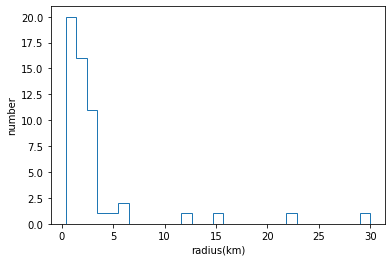

In [15]:
# plot the radius distribution
x_plot = "radius(km)"
df_plot = df_sheet

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

ax1.hist(df_plot[x_plot], bins = "auto", histtype = "step")

ax1.set_xlabel(x_plot)
ax1.set_ylabel("number")

plt.show()

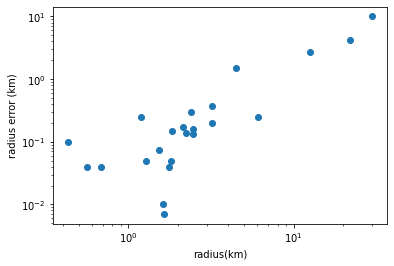

In [16]:
# plot the relation between radius and radius error (log-log)
x_plot = "radius(km)"
y_plot = "radius error (km)"
df_plot = df_sheet

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

ax1.scatter(df_plot[x_plot], df_plot[y_plot])

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

ax1.set_xscale("log")
ax1.set_yscale("log")

plt.show()

# look at the comet compositions as a function of radius

Step through all desired composition columns and plot against nuclear radius in log-log space. 
Assess possible trends with the Pearson correlation coefficient https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html. 
Values near +/- 1 indicate positive/negative correlation. Near 0 indicates no correlation.

N.B. we are calculating correlation on log10(radius), log10(composition).

CH3OH/H2O, 23 data points
log-log pearson correlation coeff = 0.463, p-value = 0.026


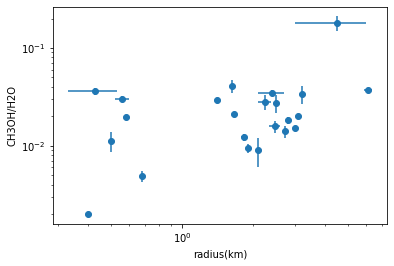

HCN/H2O, 25 data points
log-log pearson correlation coeff = 0.258, p-value = 0.213


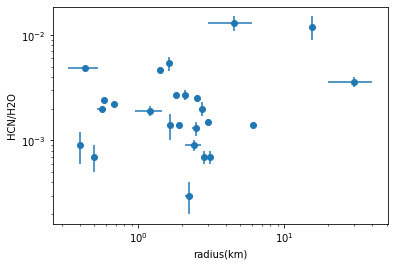

NH3/H2O, 16 data points
log-log pearson correlation coeff = -0.061, p-value = 0.824


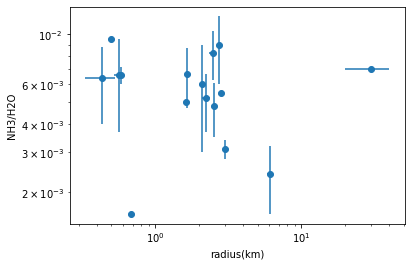

H2CO/H2O, 19 data points
log-log pearson correlation coeff = -0.061, p-value = 0.803


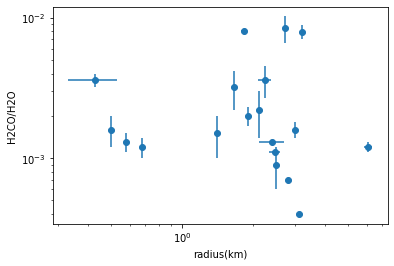

C2H2/H2O, 22 data points
log-log pearson correlation coeff = 0.112, p-value = 0.620


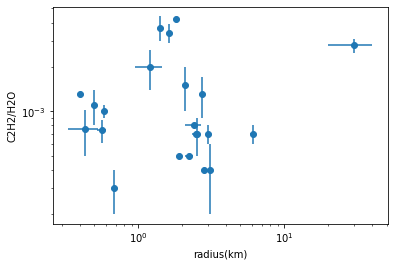

C2H6/H2O, 24 data points
log-log pearson correlation coeff = 0.291, p-value = 0.168


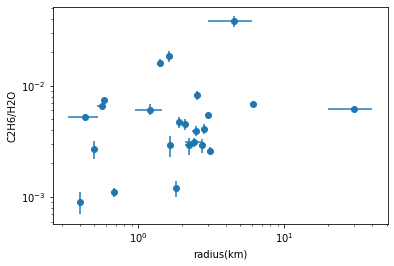

CH4/H2O, 18 data points
log-log pearson correlation coeff = 0.517, p-value = 0.028


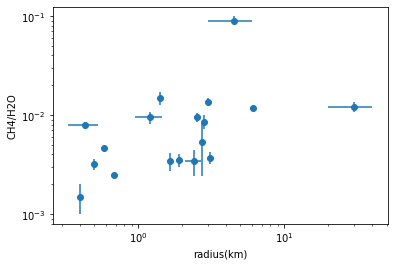

CO/H2O, 19 data points
log-log pearson correlation coeff = 0.593, p-value = 0.007


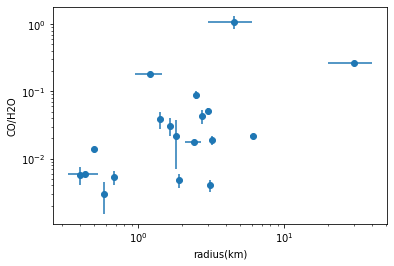

CO2/H2O, 13 data points
log-log pearson correlation coeff = -0.061, p-value = 0.844


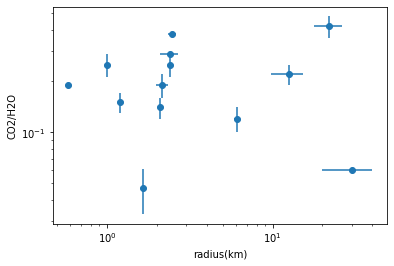

CH3CN/H2O, 5 data points
log-log pearson correlation coeff = -0.023, p-value = 0.970


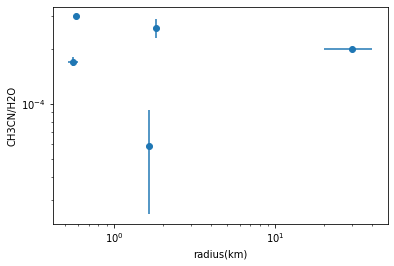

HNCO/H2O, 3 data points
log-log pearson correlation coeff = -0.980, p-value = 0.129


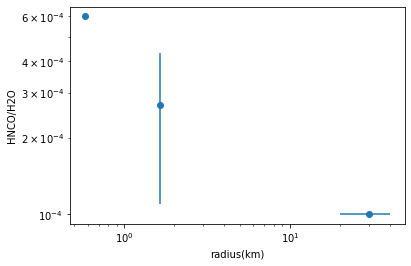

H2S/H2O, 9 data points
log-log pearson correlation coeff = 0.342, p-value = 0.368


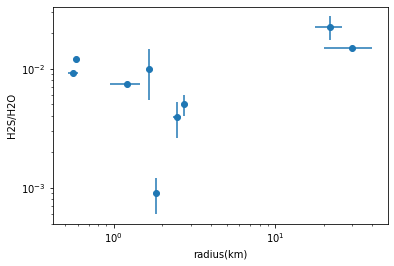

CS/H2O, 8 data points
log-log pearson correlation coeff = 0.645, p-value = 0.084


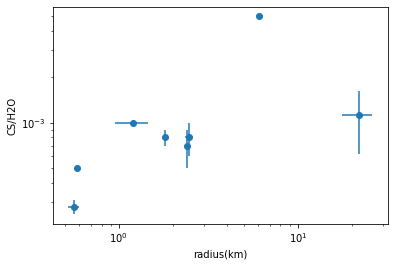

CN/OH, 37 data points
log-log pearson correlation coeff = -0.046, p-value = 0.789


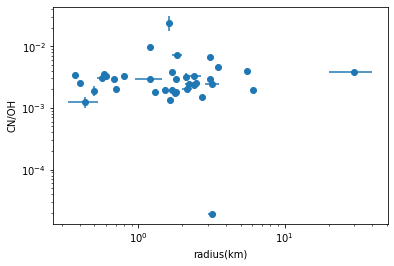

C2/OH, 36 data points
log-log pearson correlation coeff = -0.044, p-value = 0.800


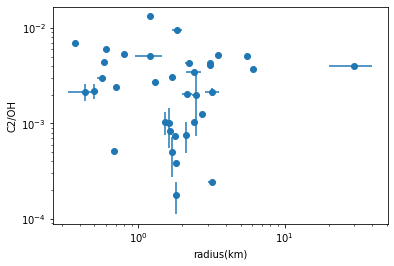

C3/OH, 34 data points
log-log pearson correlation coeff = -0.095, p-value = 0.594


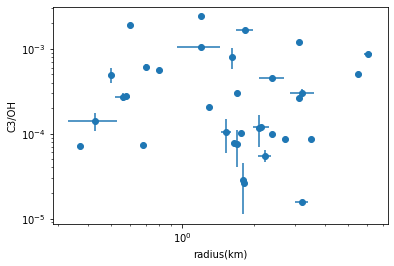

NH/OH, 32 data points
log-log pearson correlation coeff = -0.153, p-value = 0.402


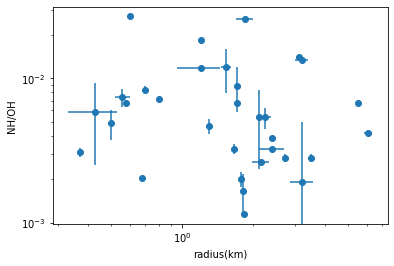

C2/CN, 42 data points
log-log pearson correlation coeff = 0.010, p-value = 0.952


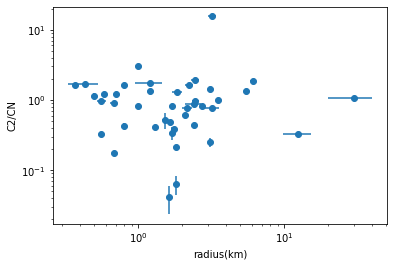

Afrho/OH, 31 data points
log-log pearson correlation coeff = 0.302, p-value = 0.099


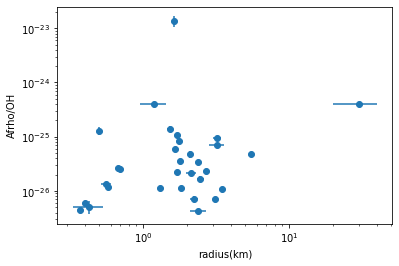

In [17]:
# look at distributions in log log space
for comp_col in comp_columns:
    
    x_plot = "radius(km)"
    x_err = "radius error (km)"
    y_plot = comp_col
    y_err = "err {}".format(comp_col)
    df_plot = df_sheet[~np.isnan(df_sheet[comp_col])]


    fig = plt.figure()
    gs = gridspec.GridSpec(1,1)
    ax1 = plt.subplot(gs[0,0])

    ax1.errorbar(x=df_plot[x_plot], y=df_plot[y_plot],
                xerr=df_plot[x_err], yerr=df_plot[y_err], fmt=".")

    ax1.scatter(df_plot[x_plot],df_plot[y_plot])

    ax1.set_xlabel(x_plot)
    ax1.set_ylabel(y_plot)

    ax1.set_xscale("log")
    ax1.set_yscale("log")

    res = stats.pearsonr(np.log10(df_plot[x_plot]),np.log10(df_plot[y_plot]))

    print("{}, {} data points".format(comp_col,len(df_plot)))
    print("log-log pearson correlation coeff = {:.3f}, p-value = {:.3f}".format(res[0],res[1]))
    
    plt.show()

# Outlier comets could affect composition-radius trends

C/2010 G2 Hill - organic rich

17P Holmes - large outburst 2007

96P Machholz - carbon depleted

We shall exclude these in future plots

# Find the median composition in different radius bins

This may give a clearer indication of any trends given the large scatter in some compositions.

In [18]:
# select the edges of the radius bins
# somewhat arbitrary, but try account for the majority of comets having radius < ~5km
rad_edges = [0,1,2,5,50]

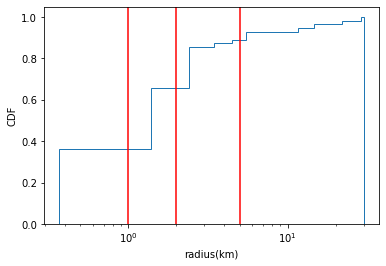

In [19]:
# plot the cumulative distribution function of radius to see if the radius bins look reasonable
# curve shows the fraction of population with radius < r

x_plot = "radius(km)"
df_plot = df_sheet
bins = "auto"

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

x=ax1.hist(df_plot[x_plot], density=True, cumulative=True, histtype='step',bins=bins)

for x in rad_edges[:-1]:
    ax1.axvline(x,c="r")

ax1.set_xlabel(x_plot)
ax1.set_ylabel("CDF")

ax1.set_xscale("log")

plt.show()

CH3OH/H2O, 21 data points
log-log pearson correlation coeff = 0.396, p-value = 0.075


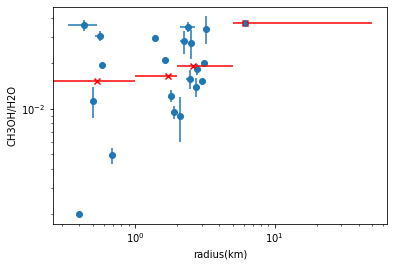

HCN/H2O, 23 data points
log-log pearson correlation coeff = 0.226, p-value = 0.300


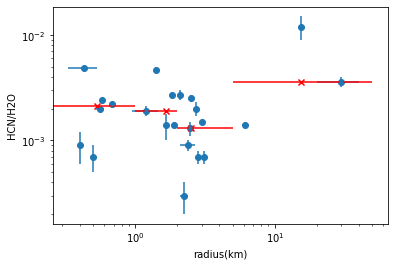

NH3/H2O, 15 data points
log-log pearson correlation coeff = -0.062, p-value = 0.827


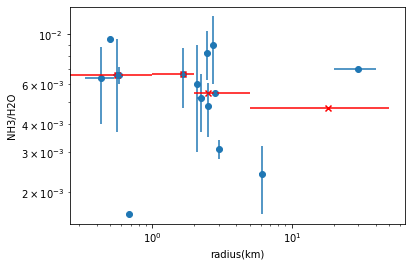

H2CO/H2O, 19 data points
log-log pearson correlation coeff = -0.061, p-value = 0.803


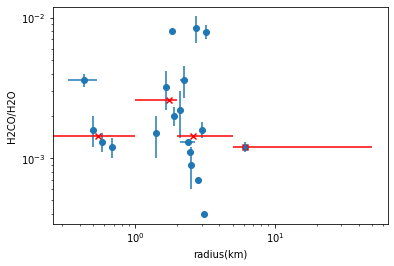

C2H2/H2O, 21 data points
log-log pearson correlation coeff = 0.126, p-value = 0.588


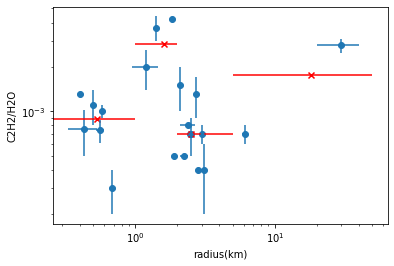

C2H6/H2O, 22 data points
log-log pearson correlation coeff = 0.252, p-value = 0.259


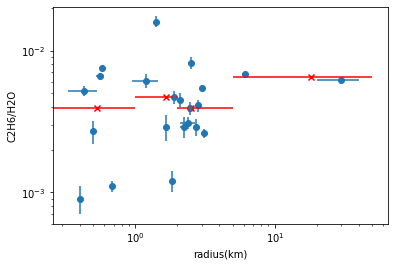

CH4/H2O, 17 data points
log-log pearson correlation coeff = 0.533, p-value = 0.027


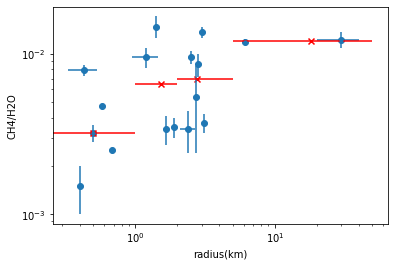

CO/H2O, 18 data points
log-log pearson correlation coeff = 0.597, p-value = 0.009


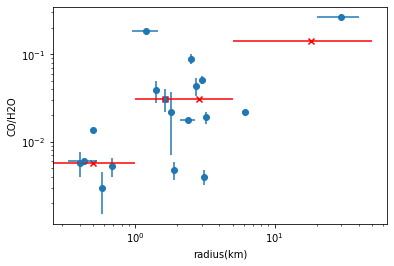

CO2/H2O, 13 data points
log-log pearson correlation coeff = -0.061, p-value = 0.844


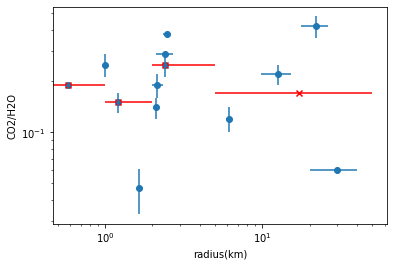

CH3CN/H2O, 5 data points
log-log pearson correlation coeff = -0.023, p-value = 0.970


/Users/jrobinson/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jrobinson/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jrobinson/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


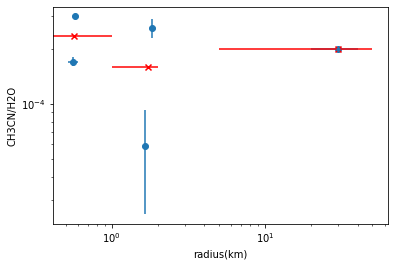

HNCO/H2O, 3 data points
log-log pearson correlation coeff = -0.980, p-value = 0.129


/Users/jrobinson/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jrobinson/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jrobinson/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


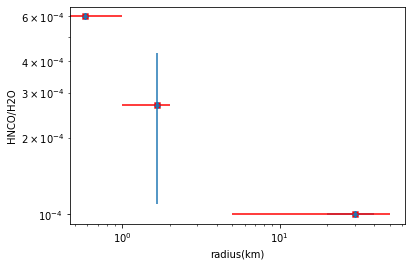

H2S/H2O, 9 data points
log-log pearson correlation coeff = 0.342, p-value = 0.368


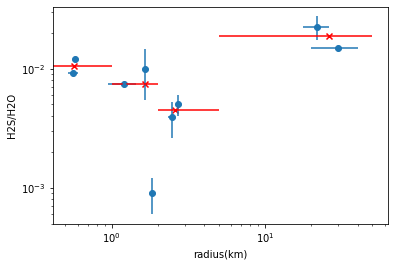

CS/H2O, 8 data points
log-log pearson correlation coeff = 0.645, p-value = 0.084


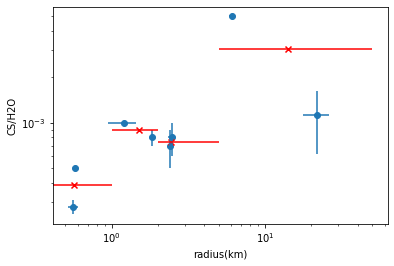

CN/OH, 35 data points
log-log pearson correlation coeff = 0.138, p-value = 0.428


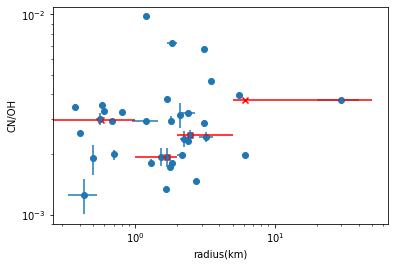

C2/OH, 34 data points
log-log pearson correlation coeff = 0.001, p-value = 0.997


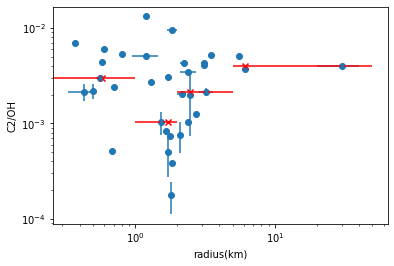

C3/OH, 32 data points
log-log pearson correlation coeff = -0.036, p-value = 0.844


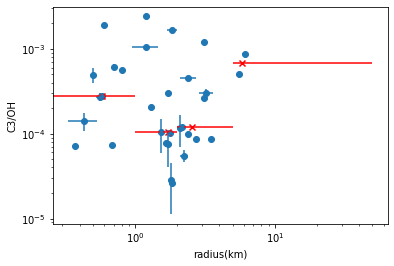

NH/OH, 31 data points
log-log pearson correlation coeff = -0.201, p-value = 0.278


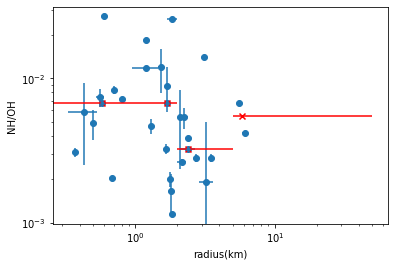

C2/CN, 40 data points
log-log pearson correlation coeff = -0.062, p-value = 0.706


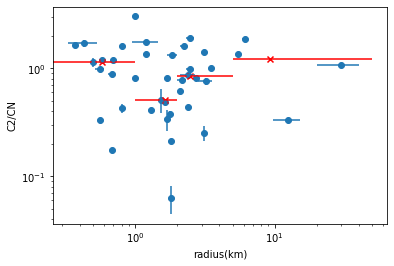

Afrho/OH, 29 data points
log-log pearson correlation coeff = 0.392, p-value = 0.035


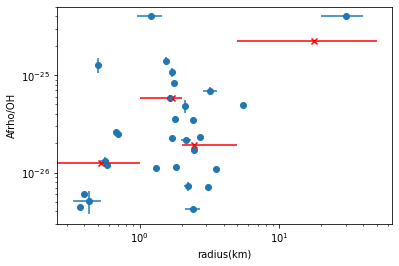

In [20]:
for comp_col in comp_columns:

    num_reject = np.array([17,96.0]) # comet numbers to exclude
    des_reject = np.array(["2010 G2"]) # comet designations to reject

    x_plot = "radius(km)"
    x_err = "radius error (km)"
    y_plot = comp_col
    y_err = "err {}".format(comp_col)
    df_plot = df_sheet[(~np.isnan(df_sheet[comp_col])) & 
                       ((~np.isin(df_sheet["Periodic Number"],num_reject)) & (~np.isin(df_sheet["Discovery ID"],des_reject)))]

    fig = plt.figure()
    gs = gridspec.GridSpec(1,1)
    ax1 = plt.subplot(gs[0,0])

    ax1.errorbar(x=df_plot[x_plot], y=df_plot[y_plot],
                xerr=df_plot[x_err], yerr=df_plot[y_err], fmt=".")

    ax1.scatter(df_plot[x_plot],df_plot[y_plot])

    # find median composition in each size bin
    edges = rad_edges

    x = []
    y = []
    std = []

    for i in range(1,len(edges)):
        l_edge = edges[i-1]
        r_edge = edges[i]

        _df = df_plot[(df_plot[x_plot]>=l_edge) & (df_plot[x_plot]<r_edge)]
        x_med = np.median(_df[x_plot])
        y_med = np.median(_df[y_plot])

        x.append(x_med)
        y.append(y_med)
        std.append(np.std(_df[y_plot]))

        ax1.hlines(y_med, xmin=l_edge, xmax=r_edge, color="r")

    ax1.scatter(x,y, c="r", marker = "x")

    # assess correlation
    res = stats.pearsonr(np.log10(df_plot[x_plot]),np.log10(df_plot[y_plot]))
    
    print("{}, {} data points".format(comp_col,len(df_plot)))
    print("log-log pearson correlation coeff = {:.3f}, p-value = {:.3f}".format(res[0],res[1]))

    ax1.set_xlabel(x_plot)
    ax1.set_ylabel(y_plot)

    ax1.set_xscale("log")
    ax1.set_yscale("log")

    plt.show()

# Get additional properties for comets, e.g Tisserand Parameter
Query SBDB, we can also get orbital elements and other quantities

Some comets have split, ensure the measurements in the spreadsheet refer to the correct fragment
 - 73P breaking up since 1995
 - 141P discovered in fragmentation outburst 1994
 - 57P split in 2002
 - C/2001 A2 split 2001

In [21]:
# correct id to use when querying SBDB:
split_comets = {"73P":"73P-C","141P":"141P",
                "57P":"57P","C/2001 A2":"C/2001 A2-A"}

In [22]:
T_J_list = []
a_list = []
e_list = []
i_list = []

for i in range(len(df_sheet)):
    num = df_sheet.iloc[i]["Periodic Number"]
    des = df_sheet.iloc[i]["Discovery ID"]
    comet_type = df_sheet.iloc[i]["Comet Type"]
    
    if comet_type=="P":
        comet_id = "{}P".format(int(num))
    elif comet_type=="C":
        comet_id = "C/{}".format(des)
    else:
        print("error")
        break
    
    # check for split comet
    if comet_id in split_comets.keys():
        comet_id = split_comets[comet_id]
        
    sbdb = SBDB.query(comet_id, id_type = "desig")
#     print(SBDB.schematic(sbdb)) # print full query results       
    
    T_J = sbdb["orbit"]["t_jup"] # Tisserand parameter wrt Jupiter
    a = sbdb["orbit"]["elements"]["a"] # semimajor axis
    e = sbdb["orbit"]["elements"]["e"] # eccentricity
    i = sbdb["orbit"]["elements"]["i"] # inclination
    orb_class = sbdb["object"]["orbit_class"]["code"] # orbital class

#     print(comet_id, T_J, a, e, i, orb_class)
    
    T_J_list.append(T_J)
    a_list.append(a.value) # sbdb returns quantities with units
    e_list.append(e)
    i_list.append(i.value)

In [23]:
# add Tisserand parameter etc to DataFrame
df_sheet["T_sbdb"] = np.array(T_J_list).astype(float)
df_sheet["a"] = a_list
df_sheet["e"] = e_list
df_sheet["i"] = i_list

In [24]:
# note that some sbdb Tisserand parameters are null
df_sheet

,Periodic Number,Comet Type,Comet Name,Discovery ID,Comet Class,radius(km),radius error (km),CH3OH/H2O,err CH3OH/H2O,CH3OH/H2O Radio,...,radius limit/notes (PDS),Optical Comp. data,IR Comp. data,Radio Comp. data,Unnamed: 90,Unnamed: 91,T_sbdb,a,e,i
index,,,,,,,,,,,,,,,,,,,,,
0,2.0,P,Encke 1,NaN,EC,2.400,0.300,0.0348,0.0027,NaN,...,NaN,Y AH95/C12/F09,Y DR16/L21,Y CR09,NaN,NaN,3.025,2.22,0.8480,11.80
1,9.0,P,Tempel 1,NaN,EC,2.720,NaN,0.0140,0.0020,0.028,...,radius from spacecraft data,Y AH95/C12/F09/LS11,Y DR16/L21,Y CR09,NaN,NaN,2.970,3.14,0.5100,10.50
2,10.0,P,Tempel 2,NaN,EC,2.465,0.135,0.0158,0.0023,0.018,...,NaN,Y C12/F09/LS11,Y DR16/L21,Y CR09,NaN,NaN,2.965,3.07,0.5360,12.00
3,17.0,P,Holmes 1,NaN,EC,1.620,0.010,0.0410,0.0060,NaN,...,NaN,Y LS11,Y DR16/L21,Y CR09,NaN,NaN,2.859,3.63,0.4300,19.10
4,21.0,P,Giacobini-Zinner 1,NaN,EC,1.820,0.050,0.0122,0.0011,0.017,...,NaN,Y AH95/C12/F09,Y DR16/Ro20/Fa19,Y CR09,NaN,NaN,2.465,3.50,0.7100,32.00
5,45.0,P,Honda-Mrkos-Pajdusakova,NaN,EC,0.430,0.100,0.0359,0.0031,NaN,...,NaN,Y F09/TRAP,Y DR20,Y CR09,NaN,NaN,2.581,3.03,0.8240,4.25
6,46.0,P,Wirtanen 1,NaN,EC,0.560,0.040,0.0303,0.0023,0.038,...,NaN,Y F09/TRAP/LS11,Y Ro21/Bo21,Y CR09,NaN,NaN,2.818,3.09,0.6590,11.70
7,73.0,P,Schwassmann-Wachmann 3 C,NaN,EC,0.680,NaN,0.0049,0.0006,NaN,...,"Fragment C. (Also r=1.1 Lis et al. 2019, measu...",Y,Y DR16/L21,Y CR09,Y,NaN,2.784,3.06,0.6920,11.40
8,81.0,P,Wild 2,NaN,EC,2.100,NaN,0.0090,0.0030,NaN,...,NaN,Y AH95/F09/LS09,Y DR16,Y CR09,NaN,NaN,2.880,3.45,0.5370,3.24


In [25]:
# we can use use the sbdb a, e, i to recalulate Tisserand parameter and orbit class

In [26]:
def Tisserand_Parameter(a,e,i,a_J=5.2):
    
    """
    Calculate the Tisserand parameter of an orbit (elements a, e, i) wrt to a perturber (a_J)
    """
    
    T = (a_J/a) + (2.0*np.sqrt((1.0-(e**2.0))*(a/a_J))*np.cos(i))
    return T

In [27]:
def classify_comet(T):
    
    """
    Simple dynamical classification using Tisserand parameter, T
    Divide into Nearly Isotropic Comets (NIC) and Ecliptic Comets (EC)
    (Further classification could be made)
    """

    if (T<2):
        group = "NIC"

    elif (T>2):
        
        group = "EC"

#         if (T<3):
#             group = "JFC"

#         else:
# #             group = "Encke or Chiron type"
#             group = None

    else:
        group = None
        
    return group

In [28]:
df_sheet["T"] = Tisserand_Parameter(df_sheet["a"],df_sheet["e"], np.radians(df_sheet["i"]))
classes = [classify_comet(T) for T in df_sheet["T"]]
df_sheet["class"] = classes

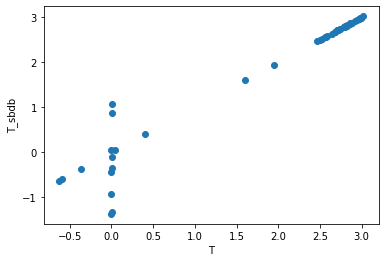

In [29]:
# There is disagreement between sbdb Tisserand and calculated Tisserand, look into this at some point...
x_plot = "T"
y_plot = "T_sbdb"
df_plot = df_sheet

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])
    
ax1.scatter(df_plot[x_plot],df_plot[y_plot])

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)
    
plt.show()

# Make plots using markers and colours

CH3OH/H2O, 21 data points
log-log pearson correlation coeff = 0.396, p-value = 0.075


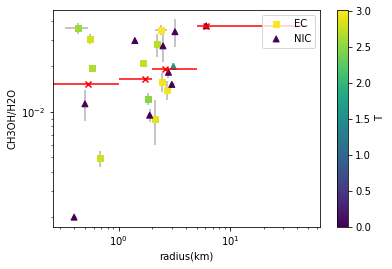

HCN/H2O, 23 data points
log-log pearson correlation coeff = 0.226, p-value = 0.300


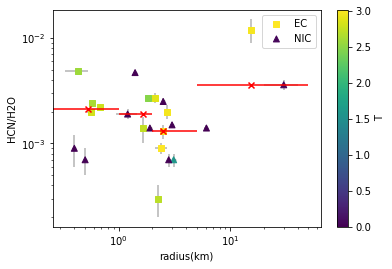

NH3/H2O, 15 data points
log-log pearson correlation coeff = -0.062, p-value = 0.827


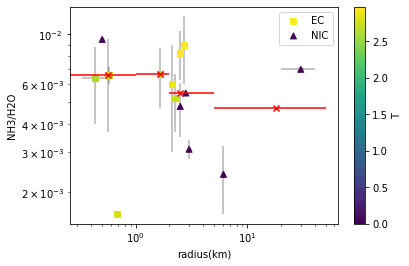

H2CO/H2O, 19 data points
log-log pearson correlation coeff = -0.061, p-value = 0.803


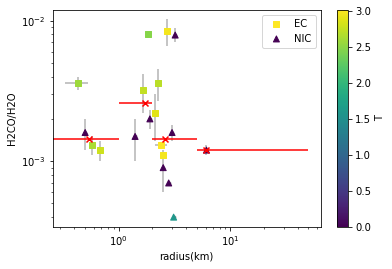

C2H2/H2O, 21 data points
log-log pearson correlation coeff = 0.126, p-value = 0.588


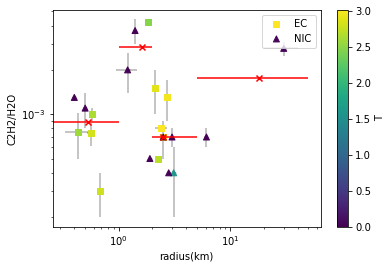

C2H6/H2O, 22 data points
log-log pearson correlation coeff = 0.252, p-value = 0.259


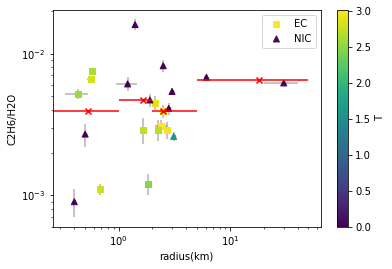

CH4/H2O, 17 data points
log-log pearson correlation coeff = 0.533, p-value = 0.027


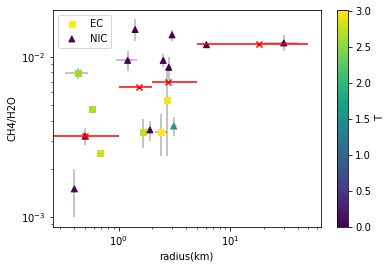

CO/H2O, 18 data points
log-log pearson correlation coeff = 0.597, p-value = 0.009


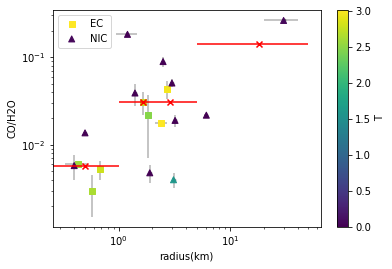

CO2/H2O, 13 data points
log-log pearson correlation coeff = -0.061, p-value = 0.844


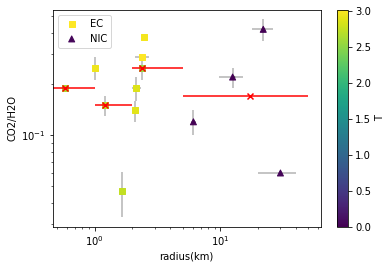

CH3CN/H2O, 5 data points
log-log pearson correlation coeff = -0.023, p-value = 0.970


/Users/jrobinson/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jrobinson/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jrobinson/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


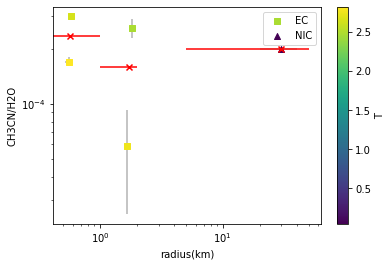

/Users/jrobinson/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jrobinson/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jrobinson/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


HNCO/H2O, 3 data points
log-log pearson correlation coeff = -0.980, p-value = 0.129


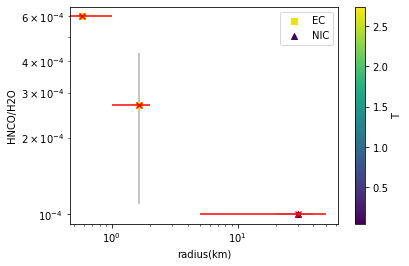

H2S/H2O, 9 data points
log-log pearson correlation coeff = 0.342, p-value = 0.368


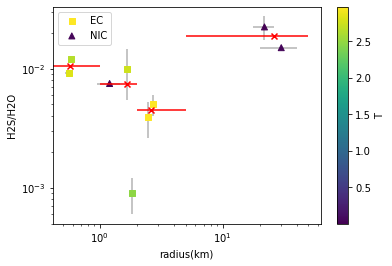

CS/H2O, 8 data points
log-log pearson correlation coeff = 0.645, p-value = 0.084


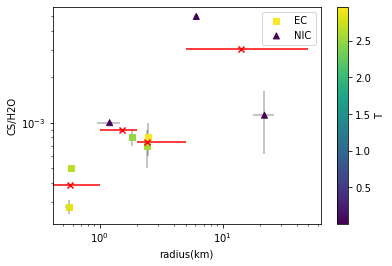

CN/OH, 35 data points
log-log pearson correlation coeff = 0.138, p-value = 0.428


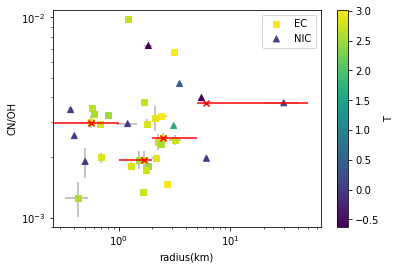

C2/OH, 34 data points
log-log pearson correlation coeff = 0.001, p-value = 0.997


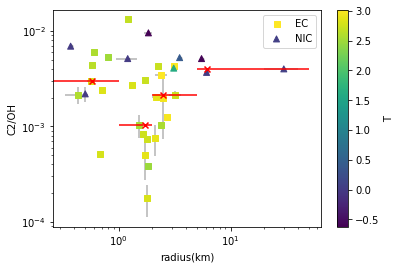

C3/OH, 32 data points
log-log pearson correlation coeff = -0.036, p-value = 0.844


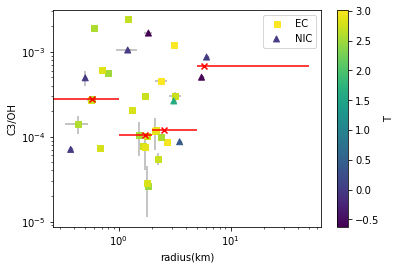

NH/OH, 31 data points
log-log pearson correlation coeff = -0.201, p-value = 0.278


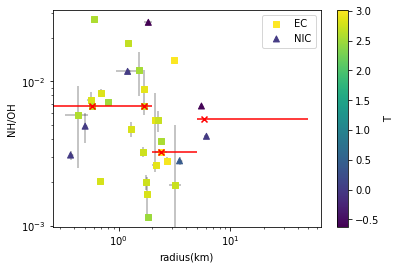

C2/CN, 40 data points
log-log pearson correlation coeff = -0.062, p-value = 0.706


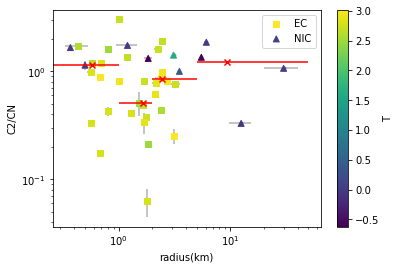

Afrho/OH, 29 data points
log-log pearson correlation coeff = 0.392, p-value = 0.035


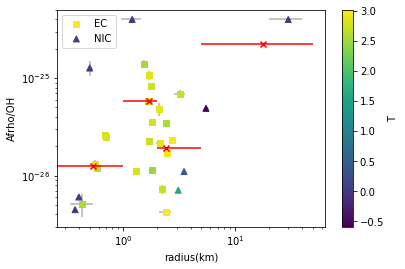

In [30]:
# make a plot with a colour scale, e.g. Tisserand parameter
# also, use different markers to represent different dynamical classes
marker_dict = {"EC":"s","NIC":"^"}

for comp_col in comp_columns:
    
    num_reject = np.array([17,96.0]) # comet numbers to exclude
    des_reject = np.array(["2010 G2"]) # comet designations to reject

    x_plot = "radius(km)"
    x_err = "radius error (km)"
    y_plot = comp_col
    y_err = "err {}".format(comp_col)
    c_plot = "T"
    marker_plot = "class"
    df_plot = df_sheet[(~np.isnan(df_sheet[comp_col])) & 
                       ((~np.isin(df_sheet["Periodic Number"],num_reject)) & (~np.isin(df_sheet["Discovery ID"],des_reject)))]

    fig = plt.figure()
    gs = gridspec.GridSpec(1,1)
    ax1 = plt.subplot(gs[0,0])

    ax1.errorbar(x=df_plot[x_plot], y=df_plot[y_plot],
                xerr=df_plot[x_err], yerr=df_plot[y_err], fmt=".", zorder=0, color = "k", alpha = 0.3)
    
    # set the max and min colour limits
    c_plot_max = np.amax(df_plot[c_plot])
    c_plot_min = np.amin(df_plot[c_plot])
    
    # scatter plot for each 
    for cl in marker_dict.keys():
        _df_plot = df_plot[df_plot[marker_plot]==cl]
        
        s1 = ax1.scatter(_df_plot[x_plot], _df_plot[y_plot], c = _df_plot[c_plot],zorder = 1,
                         marker = marker_dict[cl], label = cl,
                        vmin = c_plot_min, vmax = c_plot_max)
        
    cbar1 = fig.colorbar(s1)
    cbar1.set_label(c_plot)
    
    # find median composition in each size bin
    edges = rad_edges

    x = []
    y = []
    std = []

    for i in range(1,len(edges)):
        l_edge = edges[i-1]
        r_edge = edges[i]

        _df = df_plot[(df_plot[x_plot]>=l_edge) & (df_plot[x_plot]<r_edge)]
        x_med = np.median(_df[x_plot])
        y_med = np.median(_df[y_plot])

        x.append(x_med)
        y.append(y_med)
        std.append(np.std(_df[y_plot]))

        ax1.hlines(y_med, xmin=l_edge, xmax=r_edge, color="r")

    ax1.scatter(x,y, c="r", marker = "x")

    # assess correlation
    res = stats.pearsonr(np.log10(df_plot[x_plot]),np.log10(df_plot[y_plot]))
    
    print("{}, {} data points".format(comp_col,len(df_plot)))
    print("log-log pearson correlation coeff = {:.3f}, p-value = {:.3f}".format(res[0],res[1]))

    ax1.legend()
    ax1.set_xlabel(x_plot)
    ax1.set_ylabel(y_plot)

    ax1.set_xscale("log")
    ax1.set_yscale("log")

    plt.show()

In [31]:
# look into heliocentric distances of the comet composition measurements